In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel("Bookings_General_Feb.xlsx",sheet_name="Sheet1")

In [9]:
df.shape

(43411, 53)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43411 entries, 0 to 43410
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Doc Created On             43411 non-null  datetime64[ns]
 1   PO Date                    43408 non-null  datetime64[ns]
 2   Sales Doc.                 43411 non-null  int64         
 3   DoTy                       43411 non-null  object        
 4   SDist                      43409 non-null  object        
 5   SOff                       43408 non-null  object        
 6   SGr                        43408 non-null  object        
 7   Customer #                 43408 non-null  object        
 8   Customer Name              43411 non-null  object        
 9   DB                         702 non-null    object        
 10  LineDB                     2 non-null      object        
 11  CPSD Re-date Counter       43408 non-null  float64       
 12  Mate

## Filtrado de variables

In [14]:
# 11 variables de interés
col = ["Doc Created On","Customer Name","Ext value MXN OK","Cost MXN OK","STD MARGIN","Plataforma","Brand",
      "Vendedor","Canal / Oceano Azul","Coordinador","Gerente"]
df_1 = df[col] 

In [25]:
# valores nulos
# Encontrar valores nulos en el DataFrame
valores_nulos = df_1.isnull().sum()
valores_nulos

Doc Created On          0
Customer Name           0
Ext value MXN OK        0
Cost MXN OK             3
STD MARGIN             82
Plataforma              0
Brand                   0
Vendedor                0
Canal / Oceano Azul     0
Coordinador             3
Gerente                 3
dtype: int64

In [26]:
# borramos los valores nulos
df_2 = df_1.dropna()

In [27]:
df_2.shape

(43326, 11)

In [91]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_2.describe(include= "all")

/var/folders/hp/_b5x72296s18tx4sk63bzzv40000gn/T/ipykernel_42855/2079497072.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_2.describe(include= "all")


,Doc Created On,Customer Name,Ext value MXN OK,Cost MXN OK,STD MARGIN,Plataforma,Brand,Vendedor,Canal / Oceano Azul,Coordinador,Gerente
count,43326,43326,43326.00,43326.00,43326.00,43326,43326,43326,43326,43326,43326
unique,144,288,NaN,NaN,NaN,4,18,30,3,6,4
top,2023-01-20 00:00:00,DISTRIBUIDORA TAMEX SA PI DE CV,NaN,NaN,NaN,BURNDY,BURNDY,GUALBERTO ORDONEZ,CANAL,CARLOS CONTRERAS,MONICA CUEVAS
freq,2026,2895,NaN,NaN,NaN,27961,27955,5602,41377,21795,21985
first,2023-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-06-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9505.44,4150.59,0.61,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,52570.63,28647.03,0.18,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-1716905.78,-468507.47,-11.34,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1175.50,401.02,0.54,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df_2["Customer Name"].value_counts().describe()

count    288.00
mean     150.44
std      344.68
min        1.00
25%        6.00
50%       32.00
75%      134.25
max     2895.00
Name: Customer Name, dtype: float64

In [90]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_2.describe()

,Ext value MXN OK,Cost MXN OK,STD MARGIN
count,43326.00,43326.00,43326.00
mean,9505.44,4150.59,0.61
std,52570.63,28647.03,0.18
min,-1716905.78,-468507.47,-11.34
25%,1175.50,401.02,0.54
50%,2743.50,1002.13,0.64
75%,6931.20,2659.06,0.71
max,4280267.42,1736103.54,0.99


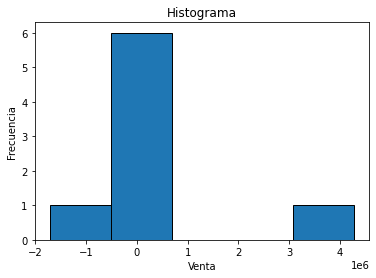

In [123]:
# Crear el histograma
plt.hist(df_2["Ext value MXN OK"].describe(), bins=5, edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma')
plt.xlabel('Venta')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

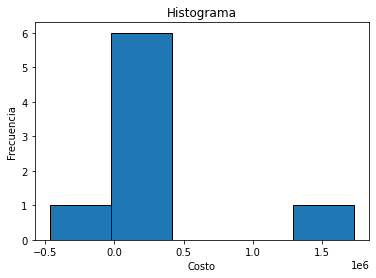

In [127]:
# Crear el histograma
plt.hist(df_2["Cost MXN OK"].describe(), bins=5, edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma')
plt.xlabel('Costo')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

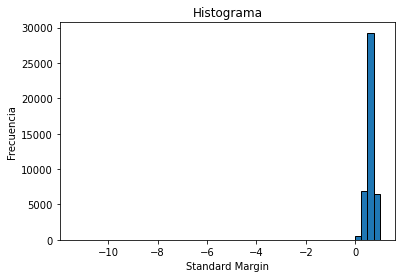

In [133]:
# Crear el histograma
plt.hist(df_2["STD MARGIN"], bins=50, edgecolor='black')

# Personalizar el gráfico
plt.title('Histograma')
plt.xlabel('Standard Margin')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [136]:
df_2["Plataforma"].value_counts().describe()

count       4.00
mean    10831.50
std     12957.67
min       565.00
25%       908.50
50%      7400.00
75%     17323.00
max     27961.00
Name: Plataforma, dtype: float64

In [137]:
df_2["Brand"].value_counts().describe()

count      18.00
mean     2407.00
std      6654.06
min         2.00
25%         6.00
50%       110.00
75%       794.50
max     27955.00
Name: Brand, dtype: float64

In [138]:
df_2["Vendedor"].value_counts().describe()

count     30.00
mean    1444.20
std     1412.81
min        1.00
25%       83.75
50%     1154.00
75%     2197.00
max     5602.00
Name: Vendedor, dtype: float64

In [139]:
df_2["Canal / Oceano Azul"].value_counts().describe()

count       3.00
mean    14442.00
std     23343.31
min        86.00
25%       974.50
50%      1863.00
75%     21620.00
max     41377.00
Name: Canal / Oceano Azul, dtype: float64

In [140]:
df_2["Coordinador"].value_counts().describe()

count       6.00
mean     7221.00
std     10278.02
min         1.00
25%       112.00
50%      1223.50
75%     14812.00
max     21795.00
Name: Coordinador, dtype: float64

In [141]:
df_2["Gerente"].value_counts().describe()

count       4.00
mean    10831.50
std     12460.53
min         1.00
25%        64.75
50%     10670.00
75%     21436.75
max     21985.00
Name: Gerente, dtype: float64

## Gráficos y Tablas

In [176]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table = df_2.pivot_table(values="Ext value MXN OK", index="Customer Name", aggfunc=np.sum)
table.sort_values(by="Ext value MXN OK",ascending=False).head(10)#.plot(kind="bar")

,Ext value MXN OK
Customer Name,
DISTRIBUIDORA TAMEX SA PI DE CV,21080071.91
GRUPO ALCIONE SA DE CV,20624105.37
WESCO DISTRIBUTION DE MEXICO,19077993.21
ELECTRO ABASTOS MONTERREY SA DE CV,14246941.58
POWERTRUSION DE MEXICO,10790611.40
COEL SA DE CV,10550424.00
TEMESA ELECTRIFICACIONES SA DE CV,8808270.43
EUROELECTRICA SA DE CV,8806061.76
DISTRIBUIDORA DE MATERIALES ELECTRI,8414611.22


<AxesSubplot:xlabel='Customer Name'>

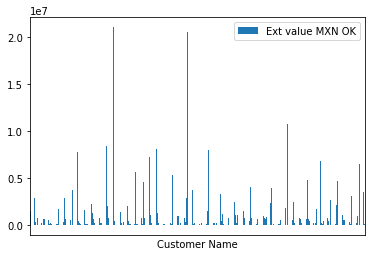

In [163]:
table.plot(kind="bar",xticks = [])

In [181]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table1 = df_2.pivot_table(values="Ext value MXN OK", index="Plataforma", aggfunc=np.sum)
table1.sort_values(by="Ext value MXN OK",ascending=False)

,Ext value MXN OK
Plataforma,
BURNDY,198067305.19
HCI,143481925.48
HPS,47605026.38
HCE,22678510.84


<AxesSubplot:xlabel='Plataforma'>

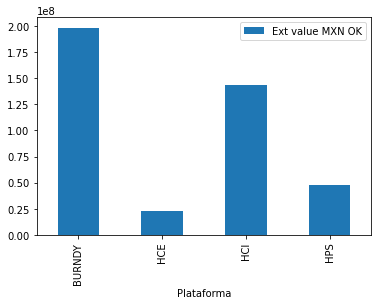

In [166]:
pd.set_option('display.float_format', '{:.2f}'.format)
table1.plot(kind="bar")

In [191]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table2 = df_2.pivot_table(values="Ext value MXN OK", index="Brand", aggfunc=np.sum)
table2.sort_values(by="Ext value MXN OK",ascending=False).head(10)

,Ext value MXN OK
Brand,
BURNDY,197826624.49
RACO,58746889.86
WDK,56657666.78
Ohio Brass,22882659.93
Killark,21894607.47
Bryant,13765247.46
Chance,12651407.39
Premise,11261860.02
Connectors,9016768.34


<AxesSubplot:xlabel='Brand'>

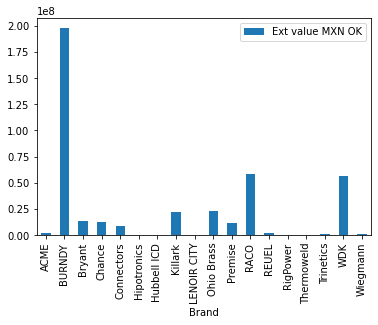

In [179]:
table2.plot(kind="bar")

In [186]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table3 = df_2.pivot_table(values="Ext value MXN OK", index="Vendedor", aggfunc=np.sum)
table3.sort_values(by="Ext value MXN OK",ascending=False).head(10)

,Ext value MXN OK
Vendedor,
GUALBERTO ORDONEZ,44693333.34
ALEJANDRO CORTES,38099190.73
JOSE VILLASANA,34330641.17
REP. ELECTRICAS GARGO SA CV,29269718.36
EDUARDO MARTINEZ,29187115.59
JUAN MANUEL SANCHEZ MORALES,28601682.91
MARIANO REYNEL,21380191.52
MIGUEL TERRAZAS,18608488.60
JOSE ENRIQUE ARANZUBIA,16771335.30


<AxesSubplot:xlabel='Vendedor'>

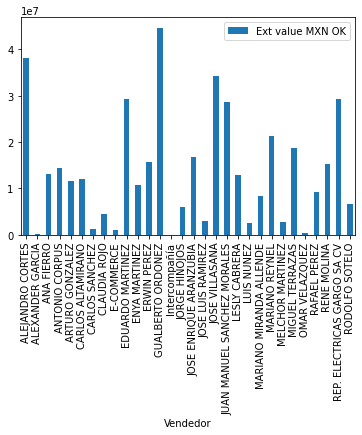

In [185]:
table3.plot(kind="bar")

In [189]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table4 = df_2.pivot_table(values="Ext value MXN OK", index="Canal / Oceano Azul", aggfunc=np.sum)
table4.sort_values(by="Ext value MXN OK",ascending=False)

,Ext value MXN OK
Canal / Oceano Azul,
CANAL,350791220.67
OCEANO AZUL,60111415.52
MKT - E-COMMERCE,930131.72


<AxesSubplot:xlabel='Canal / Oceano Azul'>

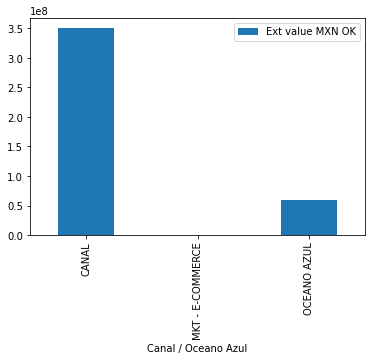

In [192]:
table4.plot(kind="bar")

In [190]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table5 = df_2.pivot_table(values="Ext value MXN OK", index="Coordinador", aggfunc=np.sum)
table5.sort_values(by="Ext value MXN OK",ascending=False)

,Ext value MXN OK
Coordinador,
CARLOS CONTRERAS,193663609.50
JESUS SAN NICOLAS,165442215.81
EDUARDO PADRON,42401725.13
RICARDO DE LA CRUZ,9358258.75
MKT - E-COMMERCE,930131.72
Intercompañía,36827.01


<AxesSubplot:xlabel='Coordinador'>

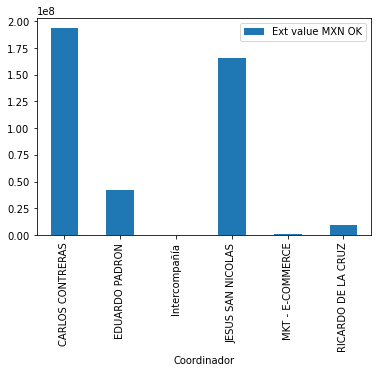

In [194]:
table5.plot(kind="bar")

In [193]:
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)
table6 = df_2.pivot_table(values="Ext value MXN OK", index="Gerente", aggfunc=np.sum)
table6.sort_values(by="Ext value MXN OK",ascending=False)

,Ext value MXN OK
Gerente,
JUAN CARLOS PRIOR,207843940.93
MONICA CUEVAS,203021868.24
MKT - E-COMMERCE,930131.72
Intercompañía,36827.01


<AxesSubplot:xlabel='Gerente'>

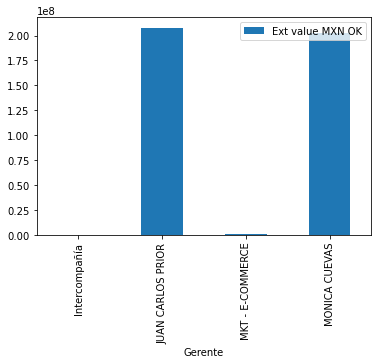

In [195]:
table6.plot(kind="bar")

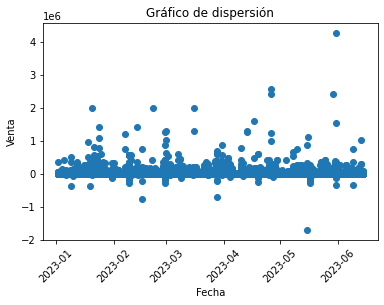

In [48]:
# Dispersion de venta por fecha
import matplotlib.pyplot as plt
import pandas as pd

# Crear el gráfico de dispersión
plt.scatter(df_2["Doc Created On"],df_2["Ext value MXN OK"])

# Personalizar el gráfico
plt.title('Gráfico de dispersión')
plt.xlabel('Fecha')
plt.ylabel('Venta')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45,fontsize=10)

# Mostrar el gráfico
plt.show()

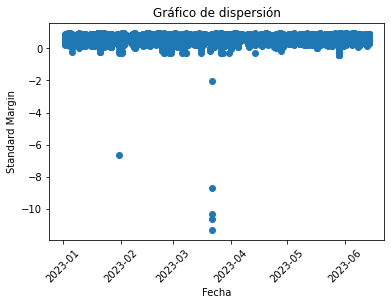

In [50]:
# Dispersion de standard margin por fecha
import matplotlib.pyplot as plt
import pandas as pd

# Crear el gráfico de dispersión
plt.scatter(df_2["Doc Created On"],df_2["STD MARGIN"])

# Personalizar el gráfico
plt.title('Gráfico de dispersión')
plt.xlabel('Fecha')
plt.ylabel('Standard Margin')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45,fontsize=10)

# Mostrar el gráfico
plt.show()

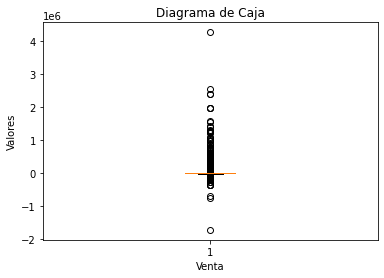

In [53]:
# BOXPLOT VENTA
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.boxplot(df_2["Ext value MXN OK"])

# Personalizar el gráfico
plt.title('Diagrama de Caja')
plt.xlabel('Venta')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()

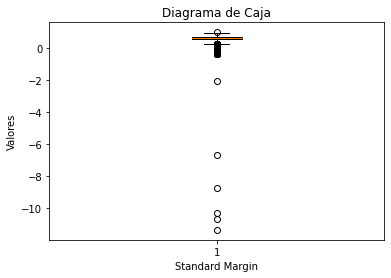

In [55]:
# BOXPLOT std margin
import matplotlib.pyplot as plt

# Crear el diagrama de caja
plt.boxplot(df_2["STD MARGIN"])

# Personalizar el gráfico
plt.title('Diagrama de Caja')
plt.xlabel('Standard Margin')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()